In [1]:
#Librerias
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization, Activation, MaxPooling2D, ZeroPadding2D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from tensorflow.keras.models import load_model
from PIL import Image, ImageFilter
from tensorflow.keras.callbacks import  ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
def leer(ubicacion):
    imagenes=[]
    letra= []
    contenido1 = os.listdir(ubicacion)
    for i in range(len(contenido1)):
        file_path1= ubicacion + "/" + contenido1[i]
        contenido2 = os.listdir(file_path1)
        for j in range(len(contenido2)):
            file_path2= file_path1 + "/" + contenido2[j]
            image = cv2.imread(file_path2)
            image = cv2.resize(image, (200, 200))  
            imagenes.append(image)
            letra.append(contenido1[i])
    return imagenes, letra

def preproceso(dat):
    imagenes=[]
    for i in range(len(dat)):
        img = Image.fromarray(dat[i])
        img= img.resize((224,224))
        edges = img.filter(ImageFilter.FIND_EDGES)
        sharp_img = img.filter(ImageFilter.SHARPEN)
        img_gray_smooth = sharp_img.filter(ImageFilter.SMOOTH)
        edge_enhance = img_gray_smooth.filter(ImageFilter.EDGE_ENHANCE)
        img_gs= np.array(edge_enhance)
        imagenes.append(img_gs)
    return imagenes

def preproceso2(ubicacion):
    imagenes=[]
    letra= []
    contenido1 = os.listdir(ubicacion)
    for i in range(len(contenido1)):
        file_path1= ubicacion + "/" + contenido1[i]
        contenido2 = os.listdir(file_path1)
        for j in range(len(contenido2)):
            file_path2= file_path1 + "/" + contenido2[j]
            with Image.open(file_path2) as img:
                img.load()
            type(img)
            isinstance(img, Image.Image)
            img= img.resize((200,200))
            img_gray = img.convert("L")
            edges = img_gray.filter(ImageFilter.FIND_EDGES)
            sharp_img = img_gray.filter(ImageFilter.SHARPEN)
            img_gray_smooth = sharp_img.filter(ImageFilter.SMOOTH)
            edge_enhance = img_gray_smooth.filter(ImageFilter.EDGE_ENHANCE)
            img_gs= np.array(edge_enhance)
            imagenes.append(img_gs)
            letra.append(contenido1[i])
    return imagenes, letra

In [39]:
ubicacionTrain= 'C:/Users/Blue/Documents/MCD/ProcesamientodeDatos/asldataset/Train'
contenidoTrain1 = os.listdir(ubicacionTrain)
DTrain= []
for i in range(len(contenidoTrain1)):
    file_pathTrain= ubicacionTrain + "/" + contenidoTrain1[i]
    contenidoTrain2 = os.listdir(file_pathTrain)
    DTrain.append([contenidoTrain1[i], len(contenidoTrain2)])
columnas= ["Letra", "Cantidad de Imagenes"]
DatosTrain= pd.DataFrame(DTrain, columns= columnas)
DatosTrain

,Letra,Cantidad de Imagenes
0,0,70
1,1,70
2,2,70
3,3,70
4,4,70
5,5,70
6,6,70
7,7,70
8,8,70
9,9,70


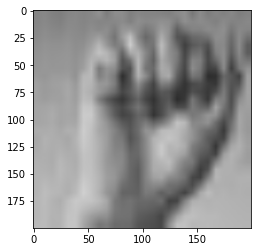

In [3]:
ubicacion= 'C:/Users/Blue/Documents/MCD/ProcesamientodeDatos/asldataset/Train'
prueba = leer(ubicacion)
imgplot = plt.imshow(prueba[0][701])
plt.show()

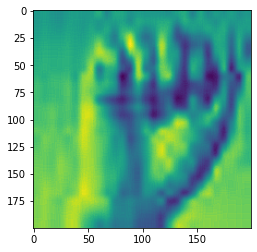

In [4]:
ubicacion= 'C:/Users/Blue/Documents/MCD/ProcesamientodeDatos/asldataset/Train'
prueba2 = preproceso2(ubicacion)
imgplot = plt.imshow(prueba2[0][701])
plt.show()

In [5]:
data= prueba2[0]
data = np.array(data, dtype="float") / 255.0
print("Image Properties")
print("- Number of Pixels: " + str(data[0].size))
print("- Shape/Dimensions: " + str(data[0].shape))

Image Properties
- Number of Pixels: 40000
- Shape/Dimensions: (200, 200)


In [7]:
le = LabelEncoder()
labels = le.fit_transform(prueba2[1])
labels = np_utils.to_categorical(labels, 34)

In [8]:
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.25, random_state=42)


In [ ]:
#RED BASADA EN LA ALEXNET

In [46]:
#RED BASADA EN LA ALEXNET
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(200, 200,1),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Layer 2
model.add(Conv2D(36, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Layer 3
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Layer 5
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Layer 6
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
#flatten output of conv
model.add(Flatten())
model.add(Dense(34))
model.add(Activation('softmax'))

In [47]:
model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=["acc"])
early_stop= EarlyStopping(monitor= "val_loss", patience= 4, restore_best_weights= True)
# training the model for 10 epochs
cnn= model.fit(X_train, Y_train, batch_size=50, epochs=10, validation_data=(X_test, Y_test),callbacks=[early_stop])

Epoch 1/10
61/61 [==============================] - 421s 7s/step - loss: 1.8832 - acc: 0.5002 - val_loss: 3.7509 - val_acc: 0.0711
Epoch 2/10
61/61 [==============================] - 350s 6s/step - loss: 0.6535 - acc: 0.8193 - val_loss: 3.5515 - val_acc: 0.1097
Epoch 3/10
61/61 [==============================] - 338s 6s/step - loss: 0.3135 - acc: 0.9252 - val_loss: 3.3054 - val_acc: 0.2085
Epoch 4/10
61/61 [==============================] - 340s 6s/step - loss: 0.1705 - acc: 0.9660 - val_loss: 2.7261 - val_acc: 0.3478
Epoch 5/10
61/61 [==============================] - 354s 6s/step - loss: 0.0961 - acc: 0.9865 - val_loss: 1.9875 - val_acc: 0.4792
Epoch 6/10
61/61 [==============================] - 343s 6s/step - loss: 0.0644 - acc: 0.9911 - val_loss: 0.7714 - val_acc: 0.8340
Epoch 7/10
61/61 [==============================] - 342s 6s/step - loss: 0.0480 - acc: 0.9941 - val_loss: 0.6020 - val_acc: 0.8646
Epoch 8/10
61/61 [==============================] - 341s 6s/step - loss: 0.0349 - a

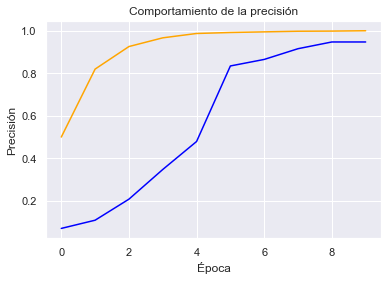

In [48]:
plt.plot(cnn.history['val_acc'], c= "blue", linestyle='-', label= "Validación")
plt.plot(cnn.history['acc'],c= "orange", linestyle='-', label= "Presición")
plt.title("Comportamiento de la precisión")
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.show()

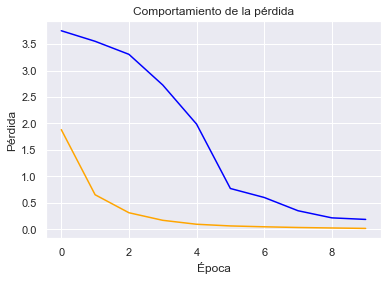

In [49]:
plt.plot(cnn.history['loss'], c= "orange", linestyle='-', label= "Perdida")
plt.plot(cnn.history['val_loss'], c= "blue", linestyle='-', label= "Validación")
plt.title("Loss")
plt.title("Comportamiento de la pérdida")
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

Matriz de confusion:


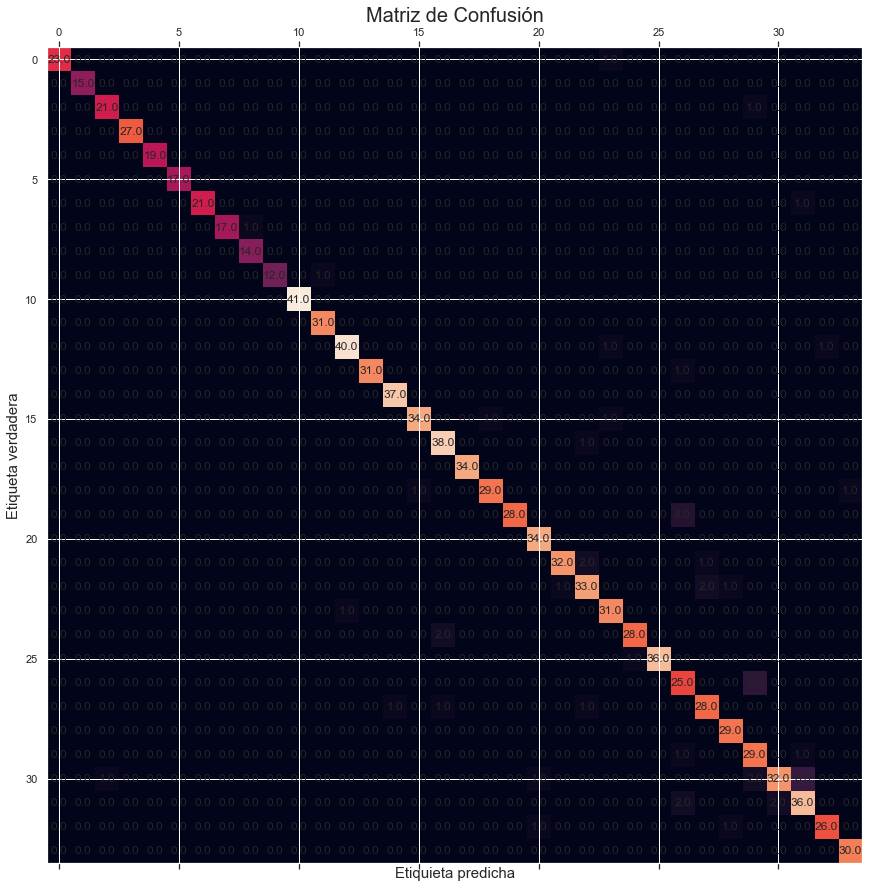

In [50]:
from numpy import argmax
predictions= model.predict(X_test)
y_pred=[]
for i in range(len(predictions)):
    y_pred.append(argmax(predictions[i]))

y_ref= np.argmax(Y_test, axis= 1)
print('Matriz de confusion:')
cm= confusion_matrix(y_ref,  y_pred)
fig, ax= plt.subplots(figsize=(15,15))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize= 20)
plt.ylabel('Etiqueta verdadera', fontsize = 15)
plt.xlabel('Etiquieta predicha', fontsize= 15)
for(i,j), z in np.ndenumerate(cm):
  ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [ ]:
#VGG16

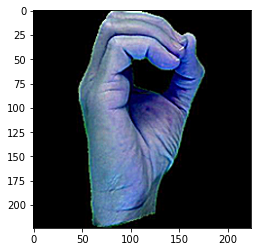

In [5]:
data2= preproceso(prueba[0])
imgplot = plt.imshow(data2[0])
plt.show()

In [9]:
len(data)

4045

In [20]:
(X_train, X_test, Y_train, Y_test) = train_test_split(data2, labels, test_size=0.25, random_state=42)


In [21]:
Y_train[0].shape

(34,)

In [7]:
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
#vgg16 model
from keras.applications.vgg16 import VGG16
# load model
model = VGG16()
# summarize the model
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
vgg_model = VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

for layer in vgg_model.layers:
    layer.trainable = False
# Make sure you have frozen the correct layers
for i, layer in enumerate(vgg_model.layers):
    print(i, layer.name, layer.trainable)

0 input_2 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


In [19]:
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(34, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs= x)

In [30]:
learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=["accuracy"])
history = transfer_model.fit(np.array(X_train), np.array(Y_train), batch_size = 200, epochs=5, validation_data=(np.array(X_test),np.array(Y_test)))

Epoch 1/5
16/16 [==============================] - 2994s 189s/step - loss: 0.5846 - accuracy: 0.9585 - val_loss: 2.2317 - val_accuracy: 0.8903
Epoch 2/5
16/16 [==============================] - 2867s 182s/step - loss: 0.3666 - accuracy: 0.9733 - val_loss: 1.1470 - val_accuracy: 0.9397
Epoch 3/5
16/16 [==============================] - 2799s 177s/step - loss: 0.1720 - accuracy: 0.9848 - val_loss: 1.5684 - val_accuracy: 0.9160
Epoch 4/5
16/16 [==============================] - 2778s 176s/step - loss: 0.0766 - accuracy: 0.9891 - val_loss: 1.5183 - val_accuracy: 0.9338
Epoch 5/5
16/16 [==============================] - 2760s 175s/step - loss: 0.1098 - accuracy: 0.9908 - val_loss: 1.7499 - val_accuracy: 0.9239


In [31]:
transfer_model.save('C:/Users/Blue/Documents/MCD/ProcesamientodeDatos')

INFO:tensorflow:Assets written to: C:/Users/Blue/Documents/MCD/ProcesamientodeDatos\assets


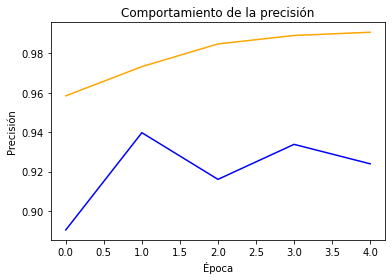

In [34]:
plt.plot(history.history['val_accuracy'], c= "blue", linestyle='-', label= "Validación")
plt.plot(history.history['accuracy'],c= "orange", linestyle='-', label= "Presición")
plt.title("Comportamiento de la precisión")
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.show()

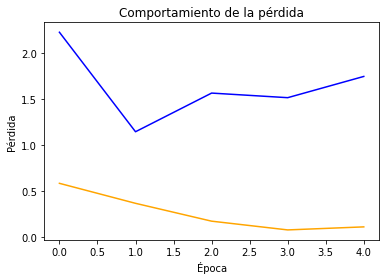

In [35]:
plt.plot(history.history['loss'], c= "orange", linestyle='-', label= "Perdida")
plt.plot(history.history['val_loss'], c= "blue", linestyle='-', label= "Validación")
plt.title("Loss")
plt.title("Comportamiento de la pérdida")
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

Matriz de confusion:


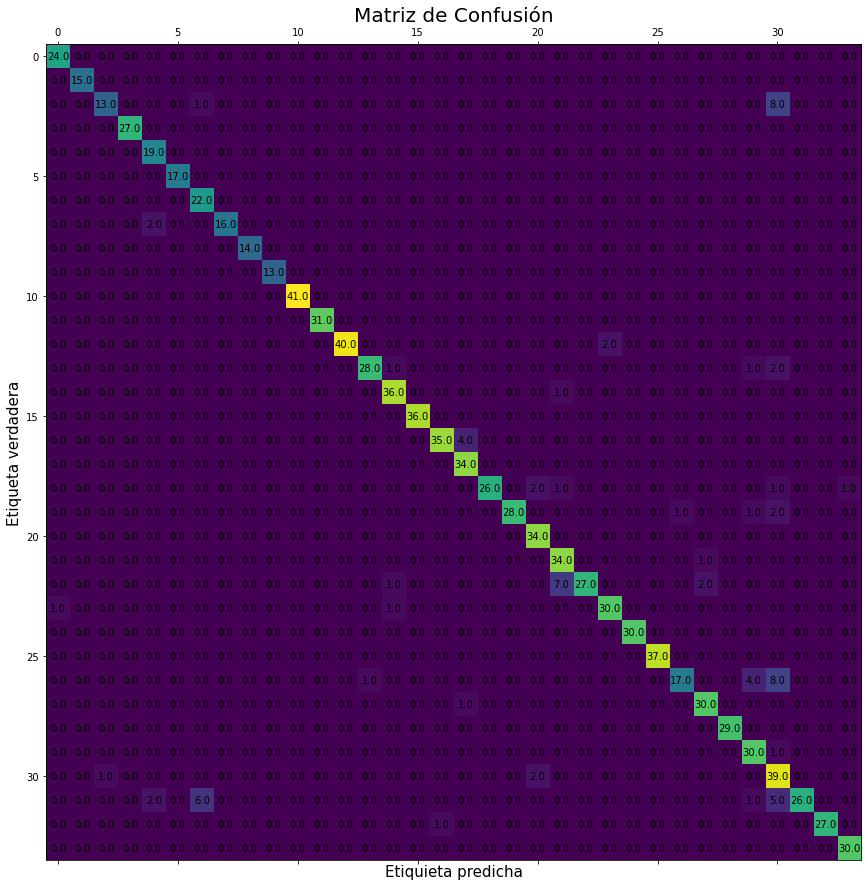

In [38]:
from numpy import argmax
predictions= transfer_model.predict(np.array(X_test))
y_pred=[]
for i in range(len(predictions)):
    y_pred.append(argmax(predictions[i]))

y_ref= np.argmax(Y_test, axis= 1)
print('Matriz de confusion:')
cm= confusion_matrix(y_ref,  y_pred)
fig, ax= plt.subplots(figsize=(15,15))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize= 20)
plt.ylabel('Etiqueta verdadera', fontsize = 15)
plt.xlabel('Etiquieta predicha', fontsize= 15)
for(i,j), z in np.ndenumerate(cm):
  ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [ ]:
#RED NUEVA

In [ ]:
#New Model
model = Sequential()
model.add(Conv2D(32, (4, 4), input_shape=(200, 200,1),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Layer 2
model.add(Conv2D(64, (2, 2), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Layer 3
model.add(Conv2D(64, (4, 4), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Layer 4
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#flatten output of conv
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(34))
model.add(Activation('softmax'))

In [13]:
model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=["acc"])
early_stop= EarlyStopping(monitor= "val_loss", patience= 4, restore_best_weights= True)
# training the model for 10 epochs
Newcnn= model.fit(X_train, Y_train, batch_size=50, epochs=10, validation_data=(X_test, Y_test),callbacks=[early_stop])

Epoch 1/10
61/61 [==============================] - 904s 15s/step - loss: 2.5102 - acc: 0.6093 - val_loss: 6.4725 - val_acc: 0.0395
Epoch 2/10
61/61 [==============================] - 917s 15s/step - loss: 0.9753 - acc: 0.8098 - val_loss: 5.5517 - val_acc: 0.0810
Epoch 3/10
61/61 [==============================] - 882s 14s/step - loss: 0.5267 - acc: 0.8846 - val_loss: 4.2119 - val_acc: 0.2075
Epoch 4/10
61/61 [==============================] - 915s 15s/step - loss: 0.2098 - acc: 0.9492 - val_loss: 1.9561 - val_acc: 0.5089
Epoch 5/10
61/61 [==============================] - 918s 15s/step - loss: 0.2302 - acc: 0.9529 - val_loss: 1.4217 - val_acc: 0.6709
Epoch 6/10
61/61 [==============================] - 866s 14s/step - loss: 0.1029 - acc: 0.9802 - val_loss: 0.9338 - val_acc: 0.8024
Epoch 7/10
61/61 [==============================] - 850s 14s/step - loss: 0.1518 - acc: 0.9690 - val_loss: 0.6212 - val_acc: 0.8715
Epoch 8/10
61/61 [==============================] - 861s 14s/step - loss: 0.

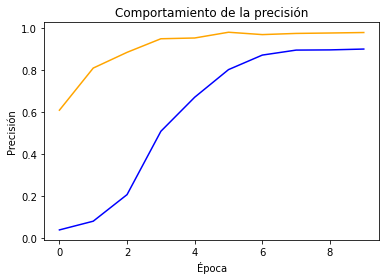

In [14]:
plt.plot(Newcnn.history['val_acc'], c= "blue", linestyle='-', label= "Validación")
plt.plot(Newcnn.history['acc'],c= "orange", linestyle='-', label= "Presición")
plt.title("Comportamiento de la precisión")
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.show()

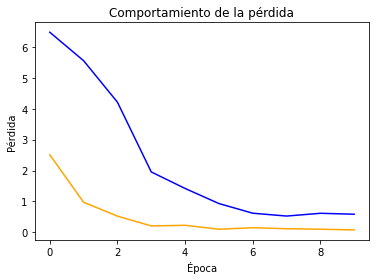

In [15]:
plt.plot(Newcnn.history['loss'], c= "orange", linestyle='-', label= "Perdida")
plt.plot(Newcnn.history['val_loss'], c= "blue", linestyle='-', label= "Validación")
plt.title("Loss")
plt.title("Comportamiento de la pérdida")
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

Matriz de confusion:


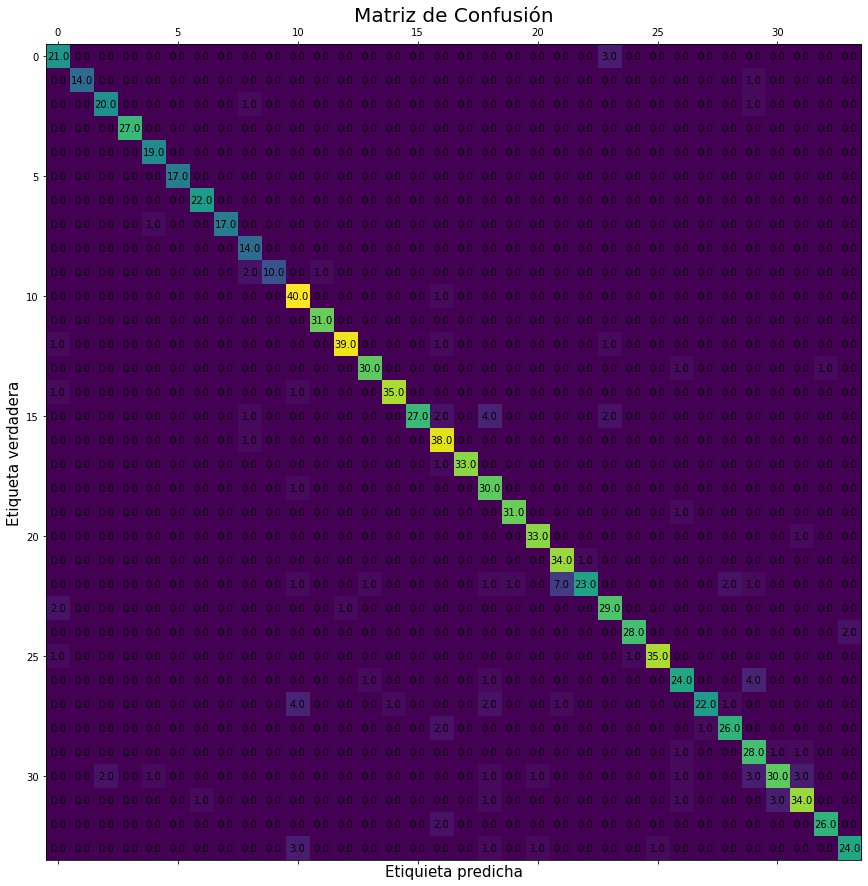

In [16]:
from numpy import argmax
predictions= model.predict(X_test)
y_pred=[]
for i in range(len(predictions)):
    y_pred.append(argmax(predictions[i]))

y_ref= np.argmax(Y_test, axis= 1)
print('Matriz de confusion:')
cm= confusion_matrix(y_ref,  y_pred)
fig, ax= plt.subplots(figsize=(15,15))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize= 20)
plt.ylabel('Etiqueta verdadera', fontsize = 15)
plt.xlabel('Etiquieta predicha', fontsize= 15)
for(i,j), z in np.ndenumerate(cm):
  ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [18]:
model.save('C:/Users/Blue/Documents/MCD/ProcesamientodeDatos')

INFO:tensorflow:Assets written to: C:/Users/Blue/Documents/MCD/ProcesamientodeDatos\assets
